# **Project 7**

In [1]:
#import all libraries needed:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project7/problem1/dermatology.csv")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


# **Check for any missing values and impute, if necessary**

In [3]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [4]:
#replace nan values in age with 0
df['age'] = df['age'].fillna(0)
df.isnull().sum()  #check

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

# **Plot the distribution of disease vs. age in order to understand the relationship between the two. Is age a good indicator of disease? Fully explain your answer.**

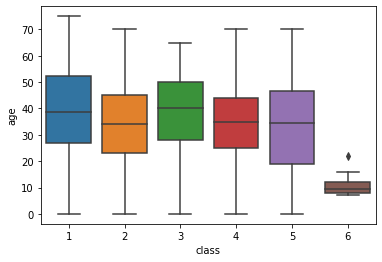

In [5]:
# Create a new dataframe for the plot
ageVsDisease = df.filter(['age','class'], axis=1)
#plot:
ax = sns.boxplot(x="class", y="age", data=ageVsDisease)

There is a similar distribution of ages for each disease seems to be similar except for 6 (pityriasis rubra pilaris).  For this reason I would say that age is not a good indicator for disease because most diseases are common for people of the same ages.

# **Use contingency tables to determine which ordinal attributes have the most leverage on disease. Plot the obtained results.**

erythema  0   1   2   3
class                  
1         1   7  63  41
2         0   5  34  22
3         1   7  49  15
4         0  11  32   6
5         2  25  22   3
6         0   2  15   3


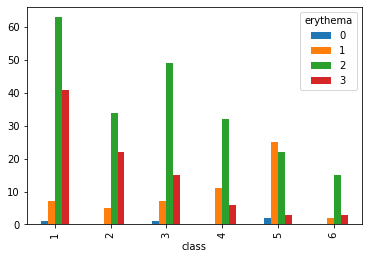

In [6]:
#cross tab between disease and erythema
crosstab = pd.crosstab(df['class'], df['erythema'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** erythema of level 2 is common in disease all disease classes.  erythema of level 3 is common in diease classes, 1 2 and 3.

This has decent leverage because there are sample cases where erythema is present in all disease classes.

scaling  0   1   2   3
class                 
1        0  13  64  35
2        0   7  43  11
3        2  28  37   5
4        0  24  25   0
5        6  34  11   1
6        0   5  15   0


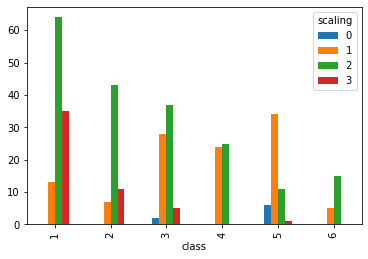

In [7]:
#cross tab between disease and scaling
crosstab = pd.crosstab(df['class'], df['scaling'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** scaling of level 2 is common in all disease classes and therefore may give decent leverage when classifying disease class.

Scaling of level 3 is very present in disease class 1 so this gives some leverage indicating that people with extreme scaling are likely to have scaling.

definite_borders   0   1   2   3
class                           
1                  0  14  73  25
2                 21  22  18   0
3                  1  10  42  19
4                  9  22  18   0
5                 23  16  11   2
6                  5   9   6   0


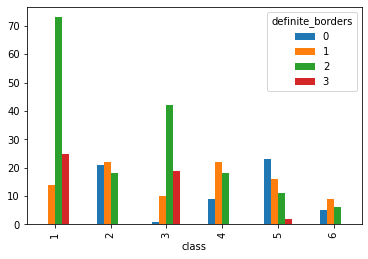

In [8]:
#cross tab between disease and definite_borders
crosstab = pd.crosstab(df['class'], df['definite_borders'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** definite_borders of level 2 and 3 is common in disease class 1 and 3.

itching   0   1   2   3
class                  
1        55  22  21  14
2         9  16  25  11
3         2   9  28  33
4        33  10   5   1
5         8   7  20  17
6        11   8   1   0


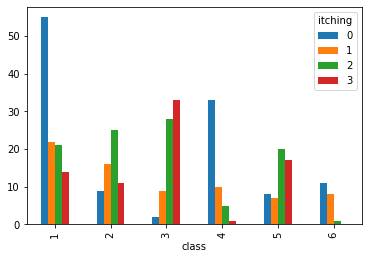

In [9]:
#cross tab between disease and itching
crosstab = pd.crosstab(df['class'], df['itching'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** itching of level 2 and 3  is very common in disease class 3 so people with high extrme itching are more common to have disease of class 3.  But ithching of level 2 is also common in disease class 1, 2 and 5 so itching has decent leverage on most disease classes.

koebner_phenomenon   0   1   2   3
class                             
1                   63  27  18   4
2                   60   0   1   0
3                   20  18  23  11
4                    9  25  12   3
5                   52   0   0   0
6                   20   0   0   0


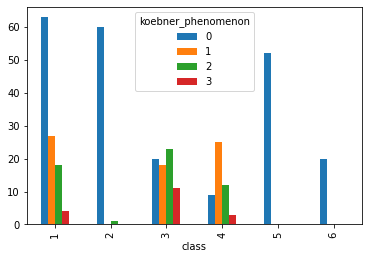

In [10]:
#cross tab between disease and koebner_phenomenon
crosstab = pd.crosstab(df['class'], df['koebner_phenomenon'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** koebner phenomenon of level 0 is very common in all disease classes excpet for class 4 and 5.  

Also, disease classes 1, 2, 5 and 6 have a lot of cases where people had koebner phenomenon of 0.  This tells us if someone is worried of having disease class 2, 5, or 6 but they have present features of koebner phenonmenon then they most likely don't have that disease.

polygonal_papules    0  1   2   3
class                            
1                  112  0   0   0
2                   61  0   0   0
3                    3  1  41  27
4                   49  0   0   0
5                   52  0   0   0
6                   20  0   0   0


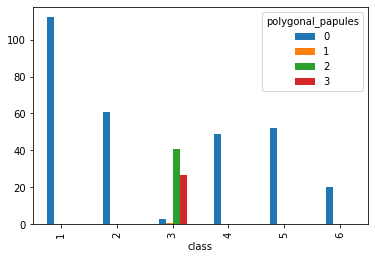

In [11]:
#cross tab between disease and polygonal_papules
crosstab = pd.crosstab(df['class'], df['polygonal_papules'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** polygonal papules has decent leverage on disease class 3 because there are no cases with present features in any other disease class.

This tells us that people with present features of polygonal papules have a good chance of having disease class 3.

follicular_papules    0  1   2  3
class                            
1                   109  2   1  0
2                    60  1   0  0
3                    72  0   0  0
4                    49  0   0  0
5                    43  6   3  0
6                     0  2  12  6


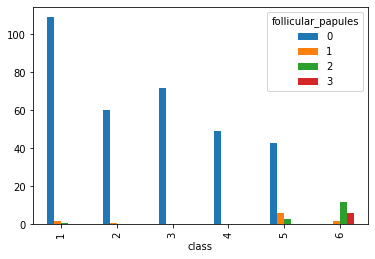

In [12]:
#cross tab between disease and follicular_papules
crosstab = pd.crosstab(df['class'], df['follicular_papules'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** follicular papules has poor leverage on all disease classes because it has no present features in any class other than 6 and 5 and these cases are still very rare.

oral_mucosal_involvement    0  1   2   3
class                                   
1                         112  0   0   0
2                          61  0   0   0
3                           5  9  45  13
4                          49  0   0   0
5                          52  0   0   0
6                          20  0   0   0


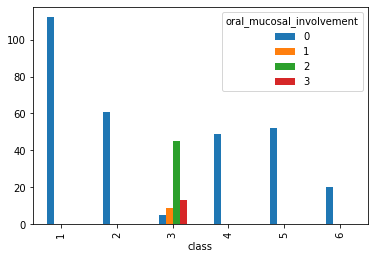

In [13]:
#cross tab between disease and oral_mucosal_involvement
crosstab = pd.crosstab(df['class'], df['oral_mucosal_involvement'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** oral_mucosal_involvement doesn't have much leverage on most disease classses because there are a lot of cases with no present features in all classes other than 3.  This may give some leverage on disease class 3 because it is the only disease that have cases of present features.

knee_and_elbow_involvement   0   1   2   3
class                                     
1                           23  15  54  20
2                           57   4   0   0
3                           71   0   1   0
4                           49   0   0   0
5                           50   2   0   0
6                            1   7   9   3


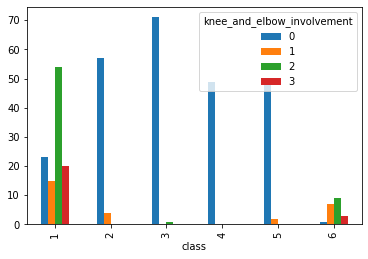

In [14]:
#cross tab between disease and knee_and_elbow_involvement
crosstab = pd.crosstab(df['class'], df['knee_and_elbow_involvement'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** Knee and elbow involvement does not seem to be present in people with disease class 2, 3, 4 and 5.  It is present in disease class 6 but not by much.  Disease class 1 seems to have the most elbow and knee involvment but there is also a decent amonut of cases where people had disease 1 but 0 present features of knee and elbow involvement. 
I would say it has poor leverage on disease class.

scalp_involvement   0   1   2   3
class                            
1                  23  23  50  16
2                  56   3   2   0
3                  70   2   0   0
4                  49   0   0   0
5                  52   0   0   0
6                  14   2   4   0


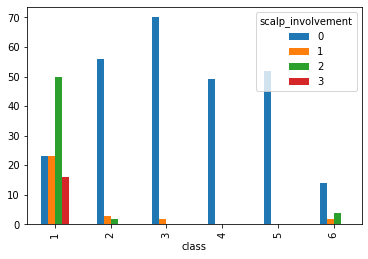

In [15]:
#cross tab between disease and scalp_involvement
crosstab = pd.crosstab(df['class'], df['scalp_involvement'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** Scalp involvment seems to be about the same as knee and elbow inolvment so it has poor leverage for most disease classes other than disease class 1.

family_history   0   1
class                 
1               80  32
2               58   3
3               71   1
4               49   0
5               52   0
6               10  10


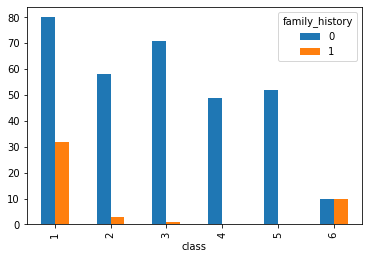

In [16]:
#cross tab between disease and family_history
crosstab = pd.crosstab(df['class'], df['family_history'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** Disease 1 and 6 have a decent amount of cases where the disease has been observed in the family.  This tells us that it may be common to get these diseases if one's family members also have the disease.

melanin_incontinence    0  1   2   3
class                               
1                     112  0   0   0
2                      61  0   0   0
3                       2  8  46  16
4                      49  0   0   0
5                      52  0   0   0
6                      20  0   0   0


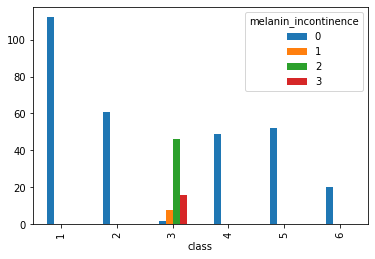

In [17]:
#cross tab between disease and melanin_incontinence
crosstab = pd.crosstab(df['class'], df['melanin_incontinence'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** Features of Melanin incontinence is only present in disease class 3 therefore it has poor leverage on disease class.

eosinophils_in_the_infiltrate    0   1  2
class                                    
1                              109   2  1
2                               39  16  6
3                               62   8  2
4                               46   3  0
5                               48   4  0
6                               20   0  0


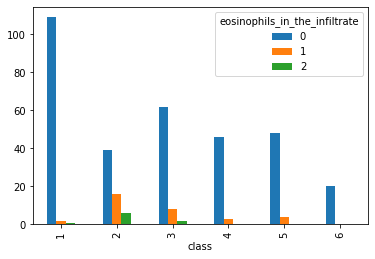

In [18]:
#cross tab between disease and eosinophils_in_the_infiltrate
crosstab = pd.crosstab(df['class'], df['eosinophils_in_the_infiltrate'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** not good leverage because eosinophilis in the infiltrate is not present in most diseases.

pnl_infiltrate   0   1   2  3
class                        
1               34  37  35  6
2               17  23  20  1
3               72   0   0  0
4               43   6   0  0
5               52   0   0  0
6               17   3   0  0


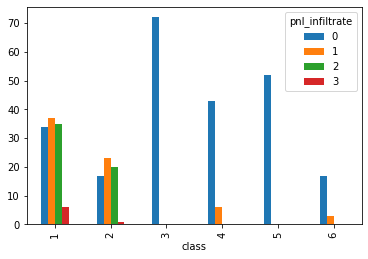

In [19]:
#cross tab between disease and pnl_infiltrate
crosstab = pd.crosstab(df['class'], df['pnl_infiltrate'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** good leverage on disease class 1 and 2 but not the other diseases.

fibrosis_of_the_papillary_dermis    0  1   2   3
class                                           
1                                 112  0   0   0
2                                  61  0   0   0
3                                  70  0   2   0
4                                  49  0   0   0
5                                   0  8  21  23
6                                  20  0   0   0


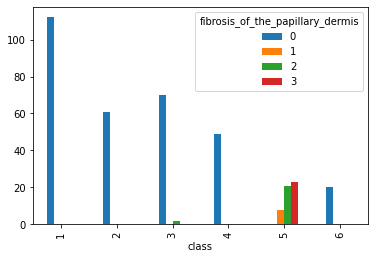

In [20]:
#cross tab between disease and fibrosis_of_the_papillary_dermis
crosstab = pd.crosstab(df['class'], df['fibrosis_of_the_papillary_dermis'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** This has a good leverage on disease class 5 because in all other disease classes there are a lot of cases who don't have any present features of "fibrosis of the papillaray dermis" and there are some cases in disease class 5 who do have present features of  "fibrosis of the papillaray dermis".

exocytosis   0   1   2   3
class                     
1           93   8  11   0
2            1   7  32  21
3            1   6  38  27
4            1   8  28  12
5           20  20  12   0
6            2   8   8   2


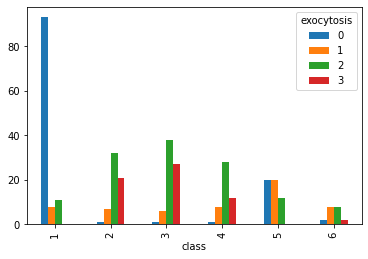

In [21]:
#cross tab between disease and exocytosis
crosstab = pd.crosstab(df['class'], df['exocytosis'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** Exocytosis has medium leverage on disease class because it has present features in all diseases.  But this isn't very strong because in general it has a very low presence in each disease.

acanthosis  0   1   2   3
class                    
1           1  14  70  27
2           4  14  35   8
3           1   9  43  19
4           4  19  26   0
5           0   7  25  20
6           0   8  11   1


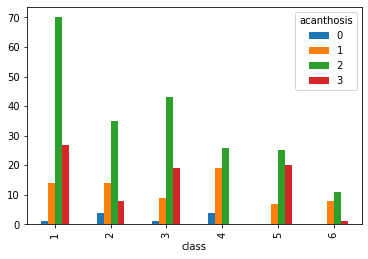

In [22]:
#cross tab between disease and acanthosis
crosstab = pd.crosstab(df['class'], df['acanthosis'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** acanthosis has decent leverage on disease classes because there are a decent amount of cases with present acanthosis features in all 6 disease classes.  This tells us that people with present features of acanthosis could be likely to have any of the 6 diseases.

hyperkeratosis   0   1   2  3
class                        
1               53  30  25  4
2               50  10   0  1
3               54  15   3  0
4               37   9   3  0
5               27  14  11  0
6                6  12   2  0


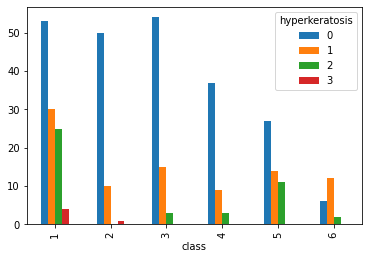

In [23]:
#cross tab between disease and hyperkeratosis
crosstab = pd.crosstab(df['class'], df['hyperkeratosis'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** hyperkeratosis does not give much leverage on disease class because there are a decent amount of cases where people had no present hyperkeratosis features in all 6 disease classes.

parakeratosis   0   1   2   3
class                        
1               1  20  69  22
2              24  17  17   3
3              15  32  20   5
4              17  27   5   0
5              27  11  14   0
6               2  11   7   0


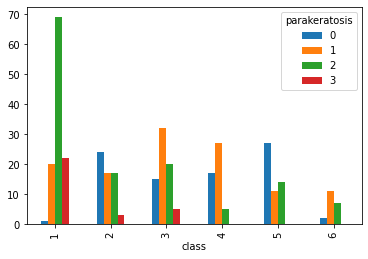

In [24]:
#cross tab between disease and parakeratosis
crosstab = pd.crosstab(df['class'], df['parakeratosis'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** parakeratosis has decent leverage on disease class because there is a decent amount of cases of people with present features of parakeratosis in all disease classes except for class 6.  

clubbing_of_the_rete_ridges   0   1   2   3
class                                      
1                             3  15  60  34
2                            61   0   0   0
3                            72   0   0   0
4                            49   0   0   0
5                            49   2   1   0
6                            18   2   0   0


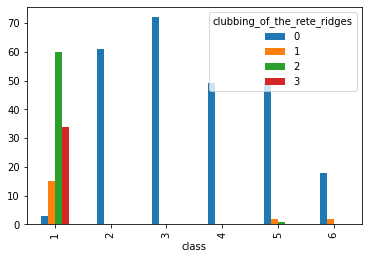

In [25]:
#cross tab between disease and clubbing_of_the_rete_ridges
crosstab = pd.crosstab(df['class'], df['clubbing_of_the_rete_ridges'])

print(crosstab)
barplot = crosstab.plot.bar()

**Leverage:** people with present features of clubbing_of_the_rete_ridges are more likely to have disease class 1 because the rest of the classes have a lot of cases with no present features.

# **Create a new column disease_1 by extracting only those records where the Disease=1 (psoriasis) , assigning “1” for those rows in the newly created  column, and marking “0” for the rest.**

In [26]:
df['disease_1'] = np.where(df['class'] == 1, 1, 0)
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,2,0,25.0,4,0
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,0,0,2,0,36.0,4,0
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,0,2,3,28.0,3,0
364,2,1,3,1,2,3,0,2,0,0,...,2,0,1,0,0,2,3,50.0,3,0


# **Create four models and evaluate each using 3-fold cross-validation:**

**A linear regression model for disease_1 vs. age even though disease_1 is a categoric variable. Plot the regression line, and compute the MSE and r-squared values for the model.**

In [27]:
#import Linear Regression:
from sklearn.linear_model import LinearRegression
#import numpy
import numpy as np
#import pyplot
import matplotlib.pyplot as plt  # To visualize
#import MSE and R2 score
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#calculate 3 folds of the data set
print(len(df)/3)

122.0


In [29]:
# shuffle the DataFrame rows
df2 = df.sample(random_state = 56,frac = 1)

In [30]:
#split data into 3 folds:
split1 = df2.iloc[0:121, :]    # Select Rows by Index List
split2 = df2.iloc[122:242, :]
split3 = df2.iloc[243:366, :]

**perform linear regression on all three folds:**

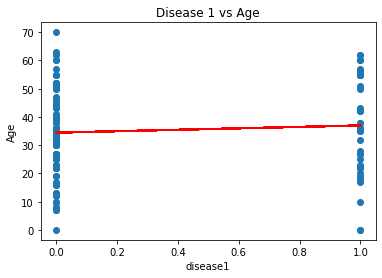

The slope:  [[2.55952381]]
The intercept:  [34.44047619]
MSE:  256.13803620621803
R2:  0.00540011423081177


In [31]:
# Save the first column (all the rows) in X and reshape as an np array 
# Note that we have provided column as 1 but rows as unknown, hence, -1
# Create the model
LRmodel = LinearRegression()  

X = split1['disease_1'].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = split1['age'].values.reshape(-1,1)

# Perform linear regression
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)

# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.title('Disease 1 vs Age')
plt.xlabel('disease1')
plt.ylabel('Age')
plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
mse1 = mean_squared_error(Y, Y_pred)
print("MSE: ", mse1)
rs1 = r2_score(Y, Y_pred)
print("R2: ", rs1)

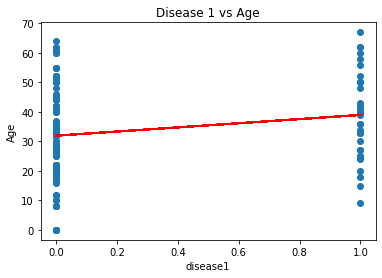

The slope:  [[7.02872777]]
The intercept:  [31.94186047]
MSE:  239.89733242134062
R2:  0.04013764279970056


In [32]:
X2 = split2['disease_1'].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y2 = split2['age'].values.reshape(-1,1)

# Perform linear regression
LRmodel.fit(X2, Y2)   

Y_pred2 = LRmodel.predict(X2)

# Visualize the dataset and the regression line:
plt.scatter(X2, Y2)
plt.plot(X2, Y_pred2, color = 'red')
plt.title('Disease 1 vs Age')
plt.xlabel('disease1')
plt.ylabel('Age')
plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
mse2 = mean_squared_error(Y2, Y_pred2)
print("MSE: ", mse2)
rs2 = r2_score(Y2, Y_pred2)
print("R2: ", rs2)

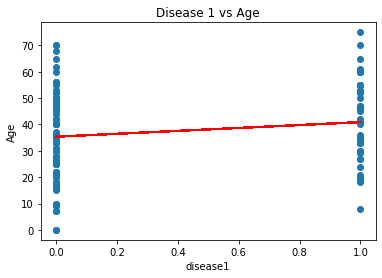

The slope:  [[5.53658537]]
The intercept:  [35.36585366]
MSE:  256.13803620621803
R2:  0.026041424508220445


In [33]:
X3 = split3['disease_1'].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y3 = split3['age'].values.reshape(-1,1)

# Perform linear regression
LRmodel.fit(X3, Y3)   

Y_pred3 = LRmodel.predict(X3)

# Visualize the dataset and the regression line:
plt.scatter(X3, Y3)
plt.plot(X3, Y_pred3, color = 'red')
plt.title('Disease 1 vs Age')
plt.xlabel('disease1')
plt.ylabel('Age')
plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)
mse3 = mean_squared_error(Y3, Y_pred3)
print("MSE: ", mse1)
rs3 = r2_score(Y3, Y_pred3)
print("R2: ", rs3)

In [34]:
#calculate average scores from all three splits:
mse_avg = (mse1+mse2+mse3)/3
rs_avg = (rs1+rs2+rs3)/3
print("Average MSE = ", mse_avg)
print("Average R-Squared = ", rs_avg)

Average MSE =  250.26825064371596
Average R-Squared =  0.02385972717957759


**An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.**

In [35]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# create model
NBmodel = GaussianNB()

**Perform NB classification on each of the 3 folds of data:**

[0.84375, 0.68]


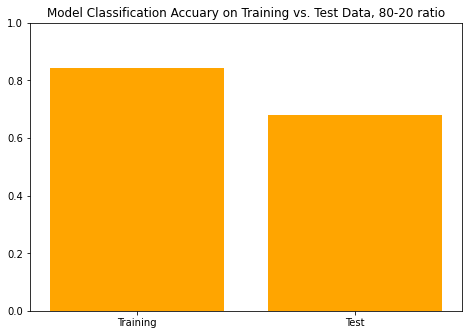

Confusion Matrix:
[[12  5]
 [ 3  5]]


In [36]:
X = split1.filter(['erythema', 'parakeratosis', 'acanthosis', 'itching', 'scaling'], axis=1)

# Save the second column (all the rows) in Y
y = split1['disease_1']

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, 
                                                    random_state=42)

# Train the model 
NBmodel.fit(X_train, y_train)
score1 = NBmodel.score(X_train, y_train)
score2 = NBmodel.score(X_test, y_test)

y_pred = NBmodel.predict(X_test)


# Calculate model accuracy on both training and test data

scores = [ score1, score2]

print(scores)

# Plot the accuracy claues
labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 80-20 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)

[0.8333333333333334, 0.875]


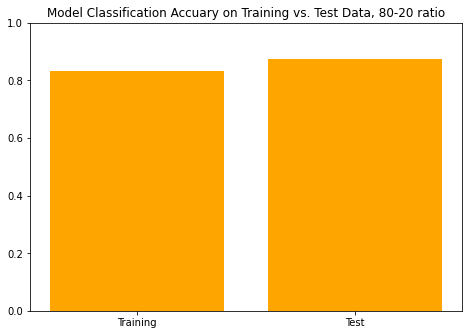

Confusion Matrix:
[[16  1]
 [ 2  5]]


In [37]:
X2 = split2.filter(['erythema', 'parakeratosis', 'acanthosis', 'itching', 'scaling'], axis=1)

# Save the second column (all the rows) in Y
y2 = split2['disease_1']

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, stratify=y2, shuffle=True, 
                                                    random_state=42)

# Train the model 
NBmodel.fit(X_train, y_train)
score1 = NBmodel.score(X_train, y_train)
score2 = NBmodel.score(X_test, y_test)

y_pred = NBmodel.predict(X_test)


# Calculate model accuracy on both training and test data

scores = [ score1, score2]

print(scores)

# Plot the accuracy claues
labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 80-20 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)

[0.8163265306122449, 0.84]


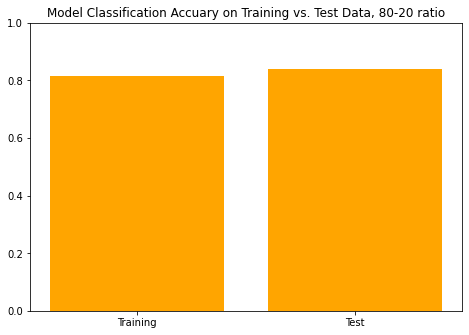

Confusion Matrix:
[[15  2]
 [ 2  6]]


In [38]:
X3 = split3.filter(['erythema', 'parakeratosis', 'acanthosis', 'itching', 'scaling'], axis=1)

# Save the second column (all the rows) in Y
y3 = split3['disease_1']

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20, stratify=y3, shuffle=True, 
                                                    random_state=42)

# Train the model 
NBmodel.fit(X_train, y_train)
score1 = NBmodel.score(X_train, y_train)
score2 = NBmodel.score(X_test, y_test)

y_pred = NBmodel.predict(X_test)


# Calculate model accuracy on both training and test data

scores = [ score1, score2]

print(scores)

# Plot the accuracy claues
labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data, 80-20 ratio')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)

In [39]:
#calculate overall accuracy after the 3 folds:
fold1 = [0.7916666666666666, 0.84]
fold2 = [0.7916666666666666, 0.7916666666666666]
fold3 = [0.8469387755102041, 0.84]
train_acc = (fold1[0]+fold2[0]+fold3[0])/3
test_acc = (fold1[1]+fold2[1]+fold3[1])/3
print("Overall training accuracy of the 3 folds = ", train_acc)
print("Overall testing accuracy of the 3 folds = ", test_acc)

Overall training accuracy of the 3 folds =  0.8100907029478458
Overall testing accuracy of the 3 folds =  0.8238888888888889


**A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.**

**makeDTModel() function:**

In [40]:
#arguemnts:
#type is the type of model: either "gini" or "entropy"
#spec is an int 1 or 2. 
#     if spec = 1 then numNodes indicates the max leaf nodes of the tree
#     if spec = 2 then numNodes indicates the max depth of the tree
#X_train is the predictor training values
#y_train is the target training values
def makeDTModel(type, numNodes, X_train, y_train, spec):
  if spec == 1:
    model = DecisionTreeClassifier(criterion = type, 
                                     max_leaf_nodes=numNodes,
                                     random_state = 120).fit(X_train, y_train)
  if spec == 2:
    model = DecisionTreeClassifier(criterion = type, 
                                     max_depth=numNodes,
                                     random_state = 120).fit(X_train, y_train)
  return model

**displayTree() function:**

In [41]:
#arguemnts:
#classifier is the model that contains the decision tree classifier
#X is the dataset containing the predictor values
#cn is a group of labels for the predictors
def displayTree(classifier, X, cn):
  # Control the figure size
  from matplotlib.pyplot import figure
  figure(figsize=(12, 10), dpi=80)
  # Plot the tree
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled = True)

**displayCM() function:**

In [42]:
#function to make and display the confusion matrix in text and heatmap
#arguemnts:
#classifier is the model that contains the decision tree classifier
#X_train is the predictor training values
#y_train is the target training values
#X_test is the predictor testing values
#y_test is the target testing values
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true = y_test, y_pred = predictions)
  print(cm)
  plt.figure(figsize=(8,8))  #control the size of the heatmap
  #create the heatmap
  sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')  #label y axis of heatmap
  plt.xlabel('Predicted label')  #label x axis of heatmap

**compareModels() function:**

In [43]:
#function to plot the side by side model comparisons
#arguments:
#label1 and label2 are strings to label each classifier
#trainScore1 and testScore1 are scores for the classifer model in label1
#trainScore2 and testScore2 are scores for the classifer model in label2
def compareModels(label1, label2, label3, trainScore1, testScore1, trainScore2, testScore2, trainScore3, testScore3):
  labels = [label1, label2, label3]
  training_scores = [trainScore1, trainScore2, trainScore3]
  testing_scores =  [testScore1, testScore2, testScore3]

  x = np.arange(3)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Generate tree for 1st fold:**

[[8 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 3 1 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 5 0]
 [1 0 0 0 0 1]]


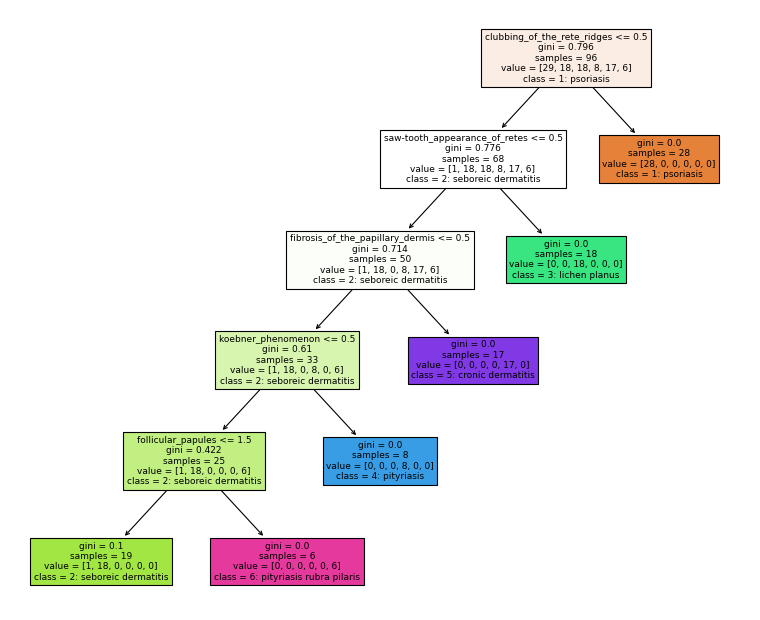

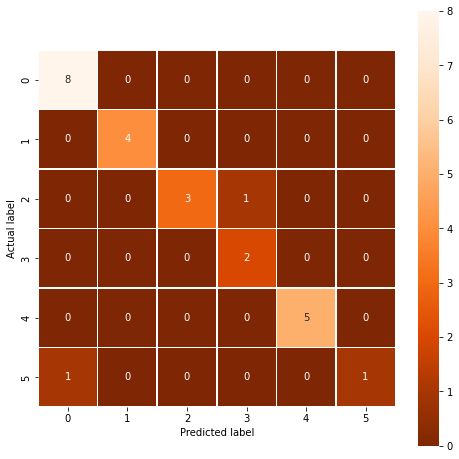

In [45]:
#prepare data:
y = split1['class']  #target values
X = split1  #predictors
X = X.drop(columns=['class', 'disease_1'])  #get rid of target
#80-20 split:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

#call to make the decision tree model:
cart_classifier1 = makeDTModel("gini", 6, X_train, y_train, 1)  #model for cart

cn = ['1: psoriasis', '2: seboreic dermatitis', '3: lichen planus', '4: pityriasis', '5: cronic dermatitis', '6: pityriasis rubra pilaris']  # labels to be passed to displayTree()
displayTree(cart_classifier1, X, cn)  #call to print the cart decision tree
#call the confusion matrix function for the cart model
displayCM(cart_classifier1, X_train, y_train, X_test, y_test)

In [46]:
#calculate classification accuracy scores for cart model:
trainScore1 = round(cart_classifier1.score(X_train, y_train), 2) # training score
testScore1 = round(cart_classifier1.score(X_test, y_test), 2)   # testing score

**Generate tree for 2nd fold:**

[[6 1 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 1 0]
 [0 0 0 4 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 1]]


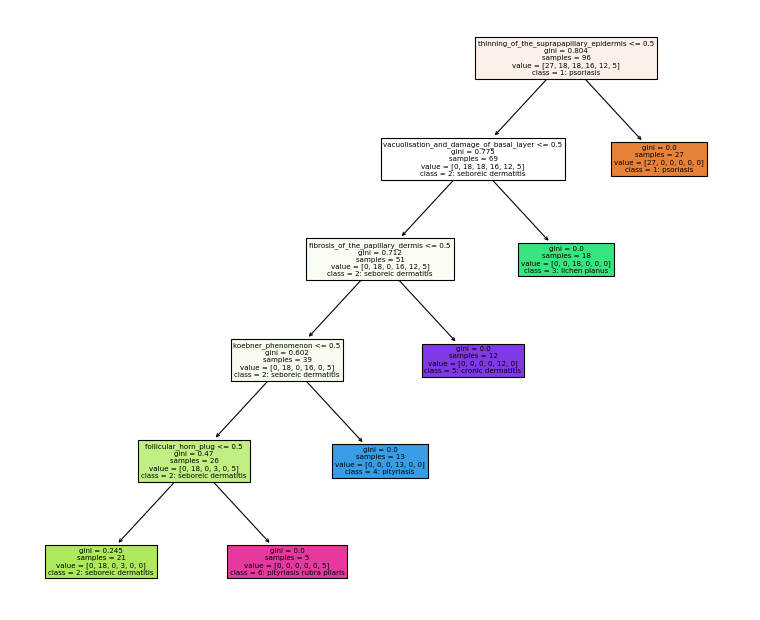

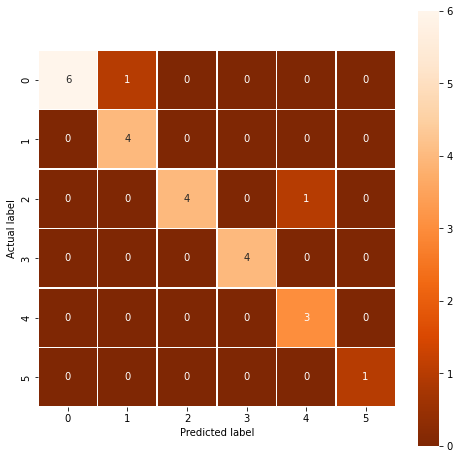

In [47]:
#prepare data:
y = split2['class']  #target values
X = split2  #predictors
X = X.drop(columns=['class', 'disease_1'])  #get rid of target
#80-20 split:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

#call to make the decision tree model:
cart_classifier2 = makeDTModel("gini", 6, X_train, y_train, 1)  #model for cart

cn = ['1: psoriasis', '2: seboreic dermatitis', '3: lichen planus', '4: pityriasis', '5: cronic dermatitis', '6: pityriasis rubra pilaris']  # labels to be passed to displayTree()
displayTree(cart_classifier2, X, cn)  #call to print the cart decision tree
#call the confusion matrix function for the cart model
displayCM(cart_classifier2, X_train, y_train, X_test, y_test)

In [48]:
#calculate classification accuracy scores for cart model:
trainScore2 = round(cart_classifier2.score(X_train, y_train), 2) # training score
testScore2 = round(cart_classifier2.score(X_test, y_test), 2)   # testing score

**Generate tree for 3rd fold:**

[[8 0 0 0 0 0]
 [0 0 0 3 0 0]
 [0 0 6 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 3 0]
 [0 0 0 1 0 0]]


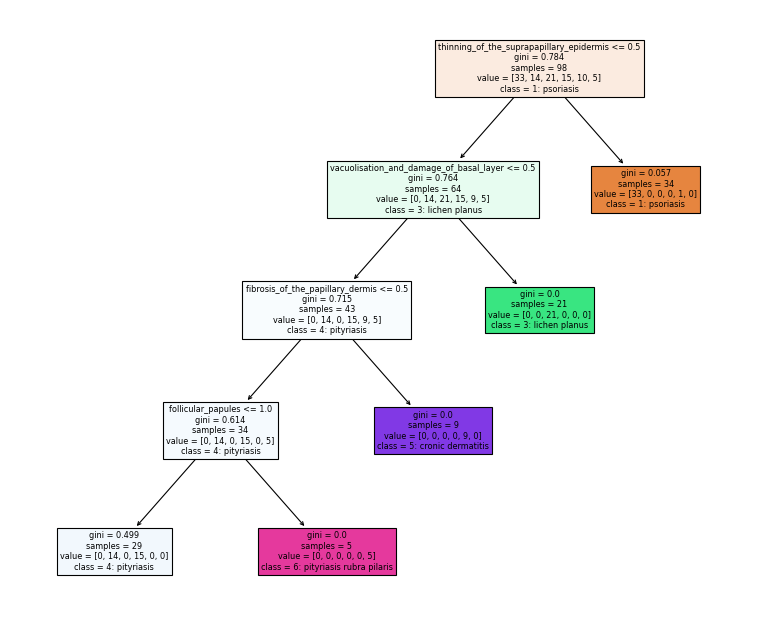

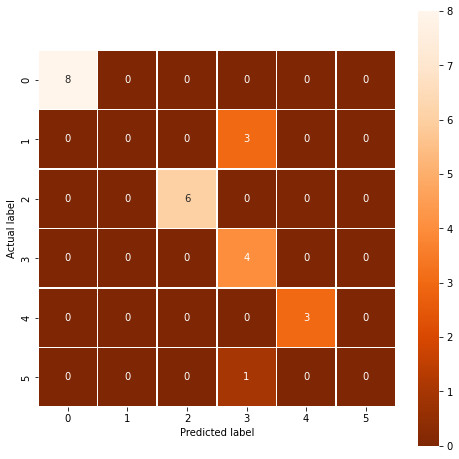

In [49]:
#prepare data:
y = split3['class']  #target values
X = split3  #predictors
X = X.drop(columns=['class', 'disease_1'])  #get rid of target
#80-20 split:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

#call to make the decision tree model:
cart_classifier3 = makeDTModel("gini", 5, X_train, y_train, 1)  #model for cart

cn = ['1: psoriasis', '2: seboreic dermatitis', '3: lichen planus', '4: pityriasis', '5: cronic dermatitis', '6: pityriasis rubra pilaris']  # labels to be passed to displayTree()
displayTree(cart_classifier3, X, cn)  #call to print the cart decision tree
#call the confusion matrix function for the cart model
displayCM(cart_classifier3, X_train, y_train, X_test, y_test)

In [50]:
#calculate classification accuracy scores for cart model:
trainScore3 = round(cart_classifier3.score(X_train, y_train), 2) # training score
testScore3 = round(cart_classifier3.score(X_test, y_test), 2)   # testing score

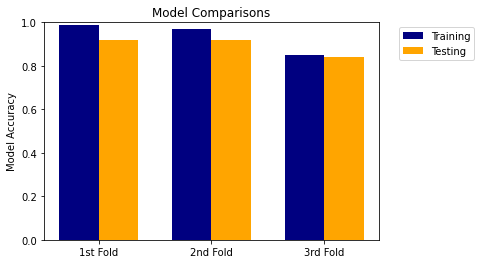

In [51]:
#call the function to compare models
compareModels("1st Fold", "2nd Fold", "3rd Fold", trainScore1, testScore1, trainScore2, testScore2, trainScore3, testScore3)

**A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix. Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.**

Reference: 

*   https://www.datacamp.com/community/tutorials/random-forests-classifier-python





In [52]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X = df
X = X.drop(columns=['class'])  #predictors
y=df['class']  # target
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


In [55]:
# calculate feature importance:
cn2 = X.columns.values.tolist()
feature_imp = pd.Series(clf.feature_importances_, index = cn2).sort_values(ascending=False)
feature_imp

fibrosis_of_the_papillary_dermis            0.081240
thinning_of_the_suprapapillary_epidermis    0.080959
koebner_phenomenon                          0.064198
clubbing_of_the_rete_ridges                 0.063890
spongiosis                                  0.058022
elongation_of_the_rete_ridges               0.053256
disease_1                                   0.052902
band-like_infiltrate                        0.043291
melanin_incontinence                        0.041728
vacuolisation_and_damage_of_basal_layer     0.035630
saw-tooth_appearance_of_retes               0.034682
pnl_infiltrate                              0.032415
oral_mucosal_involvement                    0.031476
polygonal_papules                           0.029572
scaling                                     0.026953
itching                                     0.024435
exocytosis                                  0.022606
age                                         0.020858
knee_and_elbow_involvement                  0.

In [56]:
#convert to df
feature_imp = feature_imp.to_frame(name="importance")

In [57]:
#Using drop() to delete rows based on column value < .025 because there were too many
feature_imp.drop(feature_imp[feature_imp['importance'] < .025].index, inplace = True)
feature_imp

,importance
fibrosis_of_the_papillary_dermis,0.081240
thinning_of_the_suprapapillary_epidermis,0.080959
koebner_phenomenon,0.064198
clubbing_of_the_rete_ridges,0.063890
spongiosis,0.058022
elongation_of_the_rete_ridges,0.053256
disease_1,0.052902
band-like_infiltrate,0.043291
melanin_incontinence,0.041728
vacuolisation_and_damage_of_basal_layer,0.035630


In [58]:
#turn it back into a pd series
feature_imp = feature_imp.squeeze()

No handles with labels found to put in legend.


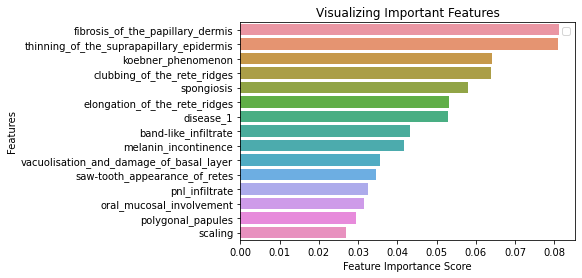

In [59]:
#plot results:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

**Carefully compare the models and summarize your findings.**

**Linear Regression Results:**

*   Average MSE =  250.26825064371596
*   Average R-Squared =  0.02385972717957759

**NB Classifier Results:**

*   Average training accuracy of the 3 folds =  0.81
*   Average testing accuracy of the 3 folds =  0.823

**Decision Tree (gini) Results:**

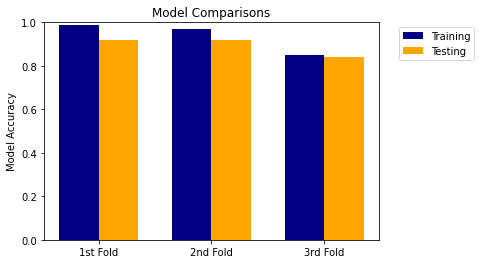

**Random Forest Results:**

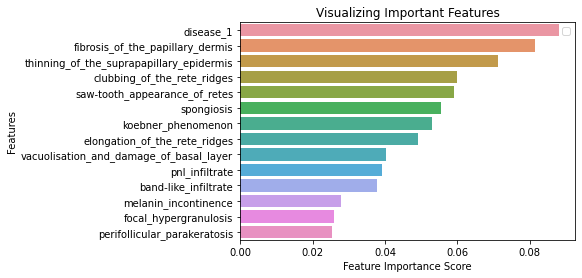

**Summary:**

- Based on my results I would say that the Random Forest model has the best results because it gives meaningful insight on the features that have the most importance when regarding the disease class. Although it says that the disease_1 column has the highest level of importance, it is important to note that that column is not a feature, it is just a column with 1 (meaning disease = 1: psoriasis) and 0 (meaning disease is not 1: psoriasis).  Therefore when deciding which feature has the most impact on disease class I would disregard that column and would say it is fibrosis of the papillary dermis because it has the next highest level of importance.  
- The linear regression models had a very poor average R score of 0.02.  It is important to note that the data used for this was disease_1 vs age so this doesn't tell us much in terms of which features have the most leverage on disease class.
- The NB classifier models had a good average accuracy score on the testing and training data (around 0.80).  This makes sense because I used the 5 predictors ('erythema', 'parakeratosis', 'acanthosis', 'itching', 'scaling')  that I thought had the most leverage on disease.  I chose these based on the cross tabulations of predictors that had the most present features in multiple disease classes.  This could tell us that the 5 predictor features that I chose may have good leverage when trying to classify disease classes.
- In my decision tree models I also had pretty decent accuracy scores.  I noticed that in all 3 folds the trees started by classifying by disease class 1 (psoriasis).  I also notied that two of the trees made that first decision based on the predictor: Thinning of the suprapapillary epidermis.  This might tell us that present features of Thinning of the suprapapillary epidermis may be a good indicator for disease class 1. 